In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('support.csv')

In [5]:
df.head()

,school_code,school_name,postcode,town_suburb,operational_directorate,principal_network,electorate,class_type,level_of_schooling
0,1015,Albion Park Public School,2527,Albion Park,Regional South,Lake Illawarra South,Kiama,Supporting students with autism (Au),Primary School
1,1028,Alma Public School,2880,Broken Hill,Rural South and West,Far West,Barwon,Supporting students with a range of disabiliti...,Primary School
2,1065,Ashfield Public School,2131,Ashfield,Metropolitan South,Canterbury,Summer Hill,Supporting students with autism (Au),Primary School
3,1121,Banksmeadow Public School,2019,Botany,Metropolitan South,Botany Bay,Maroubra,Supporting students with moderate intellectual...,Primary School
4,1148,Bass Hill Public School,2197,Bass Hill,Metropolitan South and West,Chipping Norton,East Hills,Supporting students with autism (Au),Primary School


In [215]:
df.shape

(1960, 9)

In [6]:
df.isna().sum()

school_code                0
school_name                0
postcode                   0
town_suburb                7
operational_directorate    0
principal_network          0
electorate                 0
class_type                 0
level_of_schooling         0
dtype: int64

In [55]:
missing_rows = df[df['town_suburb'].isna()]
missing_rows

,school_code,school_name,postcode,town_suburb,operational_directorate,principal_network,electorate,class_type,level_of_schooling
115,1811,Dubbo South Public School,2830,NaN,Regional North and West,Wambuul-Macquarie,Dubbo,Supporting students with a range of disabiliti...,Primary School
121,2279,Kempsey West Public School,2440,NaN,Connected Communities,Connected Communities Team 2,Oxley,Supporting students with a range of disabiliti...,Primary School
140,1811,Dubbo South Public School,2830,NaN,Regional North and West,Wambuul-Macquarie,Dubbo,Supporting students with autism and/or moderat...,Primary School
151,2279,Kempsey West Public School,2440,NaN,Connected Communities,Connected Communities Team 2,Oxley,Supporting students with mild intellectual dis...,Primary School
203,2279,Kempsey West Public School,2440,NaN,Connected Communities,Connected Communities Team 2,Oxley,Supporting students with moderate and students...,Primary School
1483,8276,Glenmore Park High School,2745,NaN,Metropolitan South and West,Penrith,Badgerys Creek,Supporting students with a range of disabiliti...,Secondary School
1533,8276,Glenmore Park High School,2745,NaN,Metropolitan South and West,Penrith,Badgerys Creek,Supporting students with autism (Au),Secondary School


In [97]:
#Handeling the missing values

rows = [115, 121, 140, 151, 203, 1483, 1533]
suburb_values = ['Dubbo', 'Kempsey', 'Dubbo', 'Kempsey', 'Kempsey', 'Glenmore Park', 'Glenmore Park']  

df.loc[rows, 'town_suburb'] = suburb_values

print(df)

      school_code                                        school_name  \
0            1015                          Albion Park Public School   
1            1028                                 Alma Public School   
2            1065                             Ashfield Public School   
3            1121                          Banksmeadow Public School   
4            1148                            Bass Hill Public School   
5            1287                            Bomaderry Public School   
6            1482                               Camden Public School   
7            1526                               Casino Public School   
8            1560                      Chipping Norton Public School   
9            1628                                Cooma Public School   
10           1630                        Coonabarabran Public School   
11           1682                             Cronulla Public School   
12           1845                             Engadine Public Sc

In [98]:
df.isna().sum()

school_code                0
school_name                0
postcode                   0
town_suburb                0
operational_directorate    0
principal_network          0
electorate                 0
class_type                 0
level_of_schooling         0
dtype: int64

In [244]:
df[df['school_code'] == 1811]


,school_code,school_name,postcode,town_suburb,operational_directorate,principal_network,electorate,class_type,level_of_schooling
115,1811,Dubbo South Public School,2830,Dubbo,Regional North and West,Wambuul-Macquarie,Dubbo,Supporting students with a range of disabiliti...,Primary School
140,1811,Dubbo South Public School,2830,Dubbo,Regional North and West,Wambuul-Macquarie,Dubbo,Supporting students with autism and/or moderat...,Primary School


In [253]:
#Checking the duplicates
df.loc[df.duplicated(['school_code', 'school_name', 'postcode', 'town_suburb', 'operational_directorate', 'principal_network', 'electorate', 'class_type'])]

,school_code,school_name,postcode,town_suburb,operational_directorate,principal_network,electorate,class_type,level_of_schooling


In [249]:
# level of schooling with highest student required support
Level_of_schooling= df.groupby('level_of_schooling')['school_code'].nunique().sort_values(ascending= False).reset_index()
Level_of_schooling.columns = ['Level Of Schooling', 'Total Schools']
Level_of_schooling

,Level Of Schooling,Total Schools
0,Primary School,490
1,Secondary School,309
2,Schools for Specific Purposes,101
3,Central/Community School,22
4,Infants School,1


# Primary School has the highest number of support followed by secondary school

In [118]:
import matplotlib.pyplot as plt

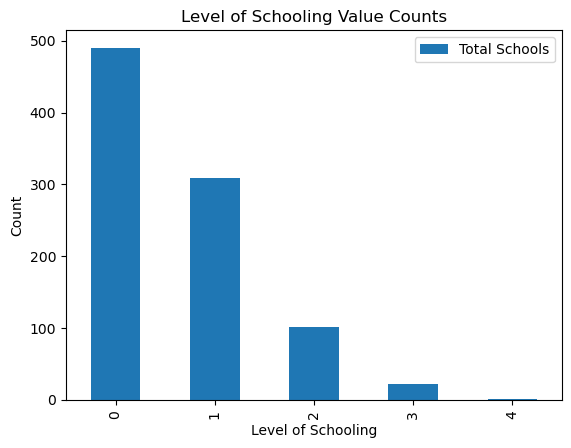

In [256]:
#plotting the outcome
Level_of_schooling.plot(kind='bar')
plt.xlabel('Level of Schooling')
plt.ylabel('Count')
plt.title('Level of Schooling Value Counts')
plt.show()

In [221]:
#number of schools under each operational_directorate
schools_per_operational_directorate= df.groupby('operational_directorate')['school_name'].nunique().sort_values(ascending= False).reset_index()
schools_per_operational_directorate.columns = ['operational_directorate', 'school_count']
schools_per_operational_directorate


,operational_directorate,school_count
0,Metropolitan South and West,139
1,Regional North,130
2,Regional South,124
3,Metropolitan South,109
4,Regional North and West,108
5,Rural South and West,105
6,Metropolitan North,104
7,Rural North,75
8,Connected Communities,29


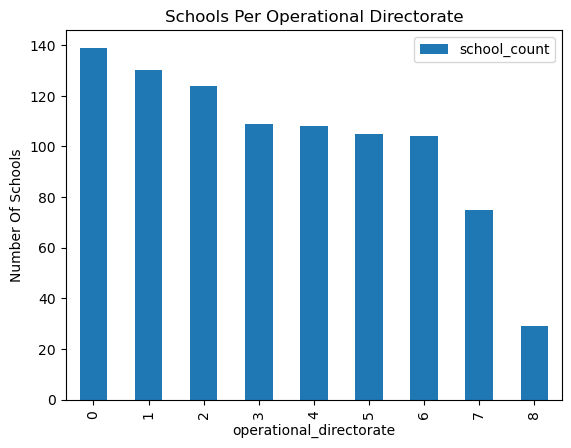

In [257]:
#plotting the outcome
schools_per_operational_directorate.plot(kind='bar')
plt.xlabel('operational_directorate')
plt.ylabel('Number Of Schools')
plt.title('Schools Per Operational Directorate')
plt.show()

In [267]:
#Highest and lowest support needed by students (class type)
support_class_type= df['class_type'].value_counts().reset_index()
support_class_type.columns = ['Class Type', 'Class Count']

support_class_type


,Class Type,Class Count
0,Supporting students with a range of disabiliti...,591
1,Supporting students with autism (Au),337
2,Supporting students with mild intellectual dis...,269
3,Supporting students with mental health issues ...,178
4,Supporting students with autism and/or moderat...,165
5,Supporting students with moderate and students...,153
6,Supporting students with moderate intellectual...,105
7,Supporting students with disability prior to s...,43
8,Supporting students with behavioural issues (BD),37
9,Supporting students requiring intensive behavi...,30


In [268]:
support_class_type['Class Count'].sum()

1960

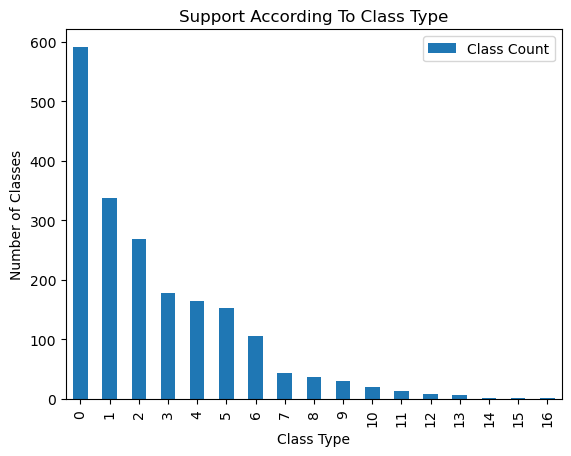

In [269]:
#plotting the outcome
support_class_type.plot(kind= 'bar')
plt.xlabel('Class Type')
plt.ylabel('Number of Classes')
plt.title('Support According To Class Type')
plt.show()

In [194]:
#Number Of Schools In Each Electorate
schools_per_electorate= df.groupby('electorate')['school_name'].nunique().reset_index()
schools_per_electorate.columns = ['Eclectorate', 'Number Of Schools']
schools_per_electorate

,Eclectorate,Number Of Schools
0,Albury,18
1,Auburn,7
2,Badgerys Creek,15
3,Ballina,6
4,Balmain,5
5,Bankstown,10
6,Barwon,30
7,Bathurst,18
8,Bega,12
9,Blacktown,12


In [125]:
print(schools_per_electorate['Number Of Schools'].sum())

923


In [254]:
#Total Number Of Schools
df['school_code'].nunique()

923

In [203]:
#Number of schools and support type in each electorate 
school_counts = df.groupby('electorate').agg({'school_name': 'nunique', 'class_type': 'nunique'}).reset_index()
school_counts.columns= ['Electorate', 'Number Of Schools', 'Number Of Class Types']

school_counts


,Electorate,Number Of Schools,Number Of Class Types
0,Albury,18,6
1,Auburn,7,6
2,Badgerys Creek,15,7
3,Ballina,6,6
4,Balmain,5,5
5,Bankstown,10,8
6,Barwon,30,9
7,Bathurst,18,8
8,Bega,12,7
9,Blacktown,12,7


In [208]:
#Electorate with highest and lowest support provided based on number of schools-

max_schools = school_counts['Number Of Schools'].max()
min_schools = school_counts['Number Of Schools'].min()


electorates_with_max_schools = school_counts[school_counts['Number Of Schools'] == max_schools]
electorates_with_min_schools = school_counts[school_counts['Number Of Schools'] == min_schools]


print("Electorate(s) with the highest number of schools:")
print(electorates_with_max_schools.to_string(index=False))

print("\nElectorate(s) with the lowest number of schools:")
print(electorates_with_min_schools.to_string(index=False))


Electorate(s) with the highest number of schools:
Electorate  Number Of Schools  Number Of Class Types
    Barwon                 30                      9

Electorate(s) with the lowest number of schools:
 Electorate  Number Of Schools  Number Of Class Types
      Manly                  1                      1
    Newtown                  1                      1
North Shore                  1                      1


In [204]:
#Electorate with highest and lowest support provided based on class types

max_schools = school_counts['Number Of Class Types'].max()
min_schools = school_counts['Number Of Class Types'].min()


electorates_with_max_schools = school_counts[school_counts['Number Of Class Types'] == max_schools]
electorates_with_min_schools = school_counts[school_counts['Number Of Class Types'] == min_schools]


print("Electorate(s) with the highest number of unique class types:")
print(electorates_with_max_schools.to_string(index=False))

print("\nElectorate(s) with the lowest number of unique class types:")
print(electorates_with_min_schools.to_string(index=False))

Electorate(s) with the highest number of unique class types:
   Electorate  Number Of Schools  Number Of Class Types
 Campbelltown                 20                     10
        Kiama                 12                     10
     Maitland                 15                     10
     Tamworth                 18                     10
    Wakehurst                  8                     10
Winston Hills                 15                     10
   Wollongong                 13                     10

Electorate(s) with the lowest number of unique class types:
 Electorate  Number Of Schools  Number Of Class Types
      Manly                  1                      1
    Newtown                  1                      1
North Shore                  1                      1


In [185]:
#Principal Networks with respect to Number Of Schools and Number of unique class types
principal_network = df.groupby('principal_network').agg({'school_code': 'nunique', 'class_type': 'nunique'}).reset_index()

principal_network.columns = ['Principal Network', 'Number of Schools', 'Number of Unique Class Types']

principal_network

,Principal Network,Number of Schools,Number of Unique Class Types
0,Albury,13,6
1,Armidale,3,5
2,Auburn,10,7
3,Bankstown,11,8
4,Barwon,2,6
5,Batemans Bay,6,7
6,Bathurst,12,8
7,Beverly Hills,9,4
8,Blue Mountains,10,4
9,Bondi,6,6


In [159]:
#Principal Network With Highest Support according to School Count

PN_MAX_SCHOOL = principal_network['Number of Schools'].max()
PN_MIN_SCHOOL = principal_network['Number of Schools'].min()

pn_with_max_schools = principal_network[principal_network['Number of Schools'] == PN_MAX_SCHOOL]
pn_with_min_schools = principal_network[principal_network['Number of Schools'] == PN_MIN_SCHOOL]


print("Principal Network(s) with the highest number of schools:")
print(pn_with_max_schools.to_string(index=False))


print("\nPrincipal Network(s) with the lowest number of schools:")
print(pn_with_min_schools.to_string(index=False))

Principal Network(s) with the highest number of schools:
Principal Network  Number of Schools  Number of Unique Class Types
        The Ponds                 16                             8

Principal Network(s) with the lowest number of schools:
Principal Network  Number of Schools  Number of Unique Class Types
           Barwon                  2                             6
     Marrickville                  2                             4


In [163]:
#Principal Network With Highest Support according to Class Type

PN_MAX_SCHOOL_a = principal_network['Number of Unique Class Types'].max()
PN_MIN_SCHOOL_b = principal_network['Number of Unique Class Types'].min()

pn_with_max_schools_a = principal_network[principal_network['Number of Unique Class Types'] == PN_MAX_SCHOOL_a]
pn_with_min_schools_b = principal_network[principal_network['Number of Unique Class Types'] == PN_MIN_SCHOOL_b]


print("Principal Network(s) with the highest Number of Unique Class Types:")
print(pn_with_max_schools_a.to_string(index=False))


print("\nPrincipal Network(s) with the lowest Number of Unique Class Types:")
print(pn_with_min_schools_b.to_string(index=False))

Principal Network(s) with the highest Number of Unique Class Types:
   Principal Network  Number of Schools  Number of Unique Class Types
        Campbelltown                 14                            10
Lake Illawarra North                 11                            10
          Shoalhaven                 10                            10

Principal Network(s) with the lowest Number of Unique Class Types:
  Principal Network  Number of Schools  Number of Unique Class Types
               Hume                  5                             1
Northern Tablelands                  4                             1
           Richmond                  3                             1


In [167]:
#Type of support classes are available in each suburb

support_classes = df.groupby('town_suburb')['class_type'].nunique().sort_values(ascending=False).reset_index()
support_classes.columns = ['Town/ Suburb', 'Number Of Support Classes']
support_classes


,Town/ Suburb,Number Of Support Classes
0,Bomaderry,10
1,Orange,8
2,Tamworth,8
3,Wagga Wagga,8
4,Campbelltown,7
5,Bathurst,7
6,Dubbo,7
7,Seven Hills,7
8,Griffith,7
9,Forster,7


In [172]:
#School Having Most Support
school_class_types = df.groupby('school_name')['class_type'].nunique()
most_focused_school = school_class_types.nlargest(10).reset_index()
most_focused_school


,school_name,class_type
0,Bomaderry High School,6
1,Bomaderry Public School,6
2,Callaghan College Waratah Campus,6
3,Dubbo College South Campus,6
4,Rutherford Technology High School,6
5,Anson Street School,5
6,Bega High School,5
7,Belmont High School,5
8,Brisbane Water Secondary College Umina Campus,5
9,Broken Hill High School,5


In [182]:
#How many schools in each principal network & support type 
school_counts = df.groupby('principal_network').agg({
    'school_code': 'nunique',
    'class_type': 'nunique'
}).reset_index()

school_counts.columns = ['Principal Network', 'School Count', 'Support Class Count']

school_counts


,Principal Network,School Count,Support Class Count
0,Albury,13,6
1,Armidale,3,5
2,Auburn,10,7
3,Bankstown,11,8
4,Barwon,2,6
5,Batemans Bay,6,7
6,Bathurst,12,8
7,Beverly Hills,9,4
8,Blue Mountains,10,4
9,Bondi,6,6


In [178]:
#Level Of schooling according to operational directorate
b= pd.crosstab(df['operational_directorate'], df['level_of_schooling'])
b

level_of_schooling,Central/Community School,Infants School,Primary School,Schools for Specific Purposes,Secondary School
operational_directorate,,,,,
Connected Communities,3,0,23,0,43
Metropolitan North,0,0,96,32,68
Metropolitan South,0,0,110,33,67
Metropolitan South and West,3,1,158,25,102
Regional North,2,0,135,18,147
Regional North and West,4,0,111,13,116
Regional South,1,0,157,22,120
Rural North,7,0,66,10,63
Rural South and West,6,0,82,25,91


In [176]:
#level of schooling according to suburb
a = pd.crosstab(df['town_suburb'], df['level_of_schooling'])
a

level_of_schooling,Central/Community School,Infants School,Primary School,Schools for Specific Purposes,Secondary School
town_suburb,,,,,
ARMIDALE,0,0,3,0,0
Adamstown,0,0,0,0,3
Airds,0,0,2,0,0
Albion Park,0,0,2,0,0
Albion Park,0,0,3,0,4
Albion Park Rail,0,0,3,0,0
Albury,0,0,1,0,1
Allambie,0,0,0,2,0
Alstonville,0,0,0,0,2


In [42]:
# class type according to level of school
class_type_by_level= pd.crosstab(df['class_type'], df['level_of_schooling'])
class_type_by_level

level_of_schooling,Central/Community School,Infants School,Primary School,Schools for Specific Purposes,Secondary School
class_type,,,,,
Supporting students requiring intensive behavioural and educational support (Tutorial centres and programs),0,0,2,4,24
Supporting students via the Centre for Effective Reading,0,0,0,1,0
Supporting students who are Deaf/Blind (DB),0,0,0,1,0
Supporting students who are blind or vision impaired (V),0,0,0,1,0
Supporting students who are deaf or hearing impaired (H),0,0,9,0,11
Supporting students with a range of disabilities with similar support needs (MC Multi Categorical),21,0,330,31,209
Supporting students with autism (Au),1,0,183,9,144
Supporting students with autism and/or moderate intellectual disability (IO/Au),0,0,109,11,45
Supporting students with behavioural issues (BD),0,0,5,22,10
